<a href="https://colab.research.google.com/github/anshika-1102/Apache_log_file_analysis/blob/main/apache_log_file_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Importing required modules*

In [1]:
!pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.5 MB/s eta 0:00:00


In [3]:
from datetime import date
import random
from random import randint, choice
import sys
import time
import faker
from datetime import datetime
import os
import re
import pandas as pd
import matplotlib as plt

*Cleaning, sanitising and manipulating data*

In [4]:
os.environ['TZ'] = 'Asia/Kolkata'
fak = faker.Faker()

def str_time_prop(start, end, format, prop):
  stime	= time.mktime(time.strptime(start, format))
  etime	= time.mktime(time.strptime(end, format))
  ptime = stime + prop * (etime - stime)
  return time.strftime(format, time.localtime(ptime))

In [5]:
#Generating random  dates  bin  two dates

def random_date(start, end, prop):
  return str_time_prop(start, end, '%d/%b/%Y:%I:%M:%S %z', prop)

In [6]:
dictionary = {'request': ['GET', 'POST', 'PUT', 'DELETE'], 'endpoint': ['/usr', '/usr/admin', '/usr/admin/developer', '/usr/login', '/usr/register'],
              'statuscode': ['303', '404', '500', '403', '502', '304','200'], 'username': ['james', 'adam', 'eve', 'alex', 'smith', 'isabella', 'david', 'angela', 'donald', 'hilary'],
              'ua' : ['Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:84.0) Gecko/20100101 Firefox/84.0',
                      'Mozilla/5.0 (Android 10; Mobile; rv:84.0) Gecko/84.0 Firefox/84.0',
                      'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36',
                      'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Mobile Safari/537.36',
                      'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4380.0 Safari/537.36 Edg/89.0.759.0',
                      'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.116 Mobile Safari/537.36 EdgA/45.12.4.5121',
                      'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36 OPR/73.0.3856.329',
                      'Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Mobile Safari/537.36 OPR/61.2.3076.56749',
                      'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.75.14 (KHTML, like Gecko) Version/7.0.3 Safari/7046A194A',
                      'Mozilla/5.0 (iPhone; CPU iPhone OS 12_4_9 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.2 Mobile/15E148 Safari/604.1'],
                      'referrer' : ['-',fak.uri()]}

In [19]:
f = open("log_file.log","w")
for _ in range(1,1000001):
  f.write('%s - - [%s] "%s %s HTTP/1.0" %s %s "%s" "%s" %s\n' %
    (fak.ipv4(),
    random_date("01/Jan/2018:12:00:00 +0530","01/Jan/2020:12:00:00 +0530",10),
    choice(dictionary['request']),
    choice(dictionary['endpoint']),
    choice(dictionary['statuscode']),
    str(int(random.gauss(5000,50))),
    choice(dictionary['referrer']),
    choice(dictionary['ua']),
    random.randint(1,5000)))

f.close()

In [21]:
# Read the log file into a pandas DataFrame and splitting columns
log_data = pd.read_csv("log_file.log", sep=" - - ", engine="python", header=None)
log_data.columns = ["IP", "LogInfo"]

#Changing timestamp format
log_data["Timestamp"] = log_data["LogInfo"].str.extract(r'\[(.*?)\]')[0]
log_data["Timestamp"] = pd.to_datetime(log_data["Timestamp"], format="%d/%b/%Y:%H:%M:%S %z")

# Read the log file into a pandas DataFrame and renaming the columns
log_data = pd.read_csv("log_file.log", sep=" ", header=None)
log_data.columns = ["Index", "IP", "LogInfo", "Request", "Endpoint", "HTTPVersion", "StatusCode", "ResponseSize", "Referrer", "UserAgent", "RandomInt"]

In [23]:
file_path = 'log_file.log'

with open(file_path, 'r') as file:
  row_count = sum(1 for _ in file)

print(f"Number of rows in the file: {row_count}")

Number of rows in the file: 1000000


In [24]:
print(log_data.describe())
print("------------------------------")
print(log_data.info())

           StatusCode    ResponseSize       RandomInt
count  1000000.000000  1000000.000000  1000000.000000
mean       373.617273     4999.602458     2500.439586
std        103.013818       49.949728     1443.493769
min        200.000000     4746.000000        1.000000
25%        303.000000     4966.000000     1249.000000
50%        403.000000     5000.000000     2502.000000
75%        500.000000     5033.000000     3751.000000
max        502.000000     5233.000000     5000.000000
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   Index         1000000 non-null  object
 1   IP            1000000 non-null  object
 2   LogInfo       1000000 non-null  object
 3   Request       1000000 non-null  object
 4   Endpoint      1000000 non-null  object
 5   HTTPVersion   1000000 non-null  object
 6   StatusCode    

**1. Top 10 hits per hour**

Top 10 hits hourly basis: 
   Hour  TotalHitsPerHour
0    20             42089
1    14             42052
2    10             41887
3    19             41855
4    12             41836
5    17             41766
6    21             41759
7     6             41750
8     9             41707
9     4             41699


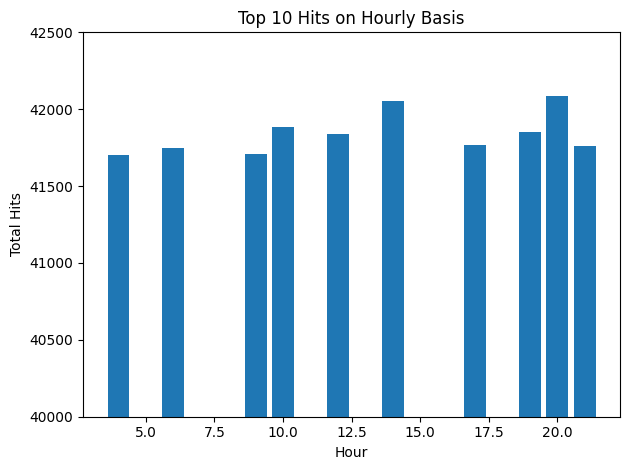

In [28]:
# Generate hours using random Library and add them to the "Hour" column
log_data["Hour"] = [random.randint(0, 23) for _ in range(len(log_data))]

# Calculate totaL number of hits per hour
hits_per_hour =	log_data.groupby("Hour")["Index"].count().reset_index()

# Sort hits per hour in descending onder of their count
hits_per_hour_sorted = hits_per_hour.sort_values(by="Index", ascending=False)

# Reset the index and rename the "Index" column
hits_per_hour_sorted.reset_index(drop=True, inplace=True)
hits_per_hour_sorted.rename(columns={"Index": "TotalHitsPerHour"}, inplace=True)

# Get the top 10 hits on an hourly basis
top_10_hits = hits_per_hour_sorted.head(10)

print("Top 10 hits hourly basis: ")
print(top_10_hits)

import matplotlib.pyplot as plt

# Set y-axis limits
y_min = 40000
y_max = 42500

# Plot the bar graph for top 10 hits
plt.bar(top_10_hits["Hour"], top_10_hits["TotalHitsPerHour"])
plt.xlabel("Hour")
plt.ylabel("Total Hits")
plt.title("Top 10 Hits on Hourly Basis")
plt.ylim(y_min, y_max) # Set y-axis limits
plt.tight_layout()
plt.show()

**2. Counting total number of HTTP codes**

In [29]:
# Count occurrences of each HTTP status code
status_code_counts = log_data["StatusCode"].value_counts()
print(status_code_counts)

502    143401
200    143233
304    143085
404    142786
303    142706
403    142623
500    142166
Name: StatusCode, dtype: int64


**3. Total hits per URL ,thus, find the URL with maximum hits**

In [31]:
# Group by endpoint and count hits
url_hits = log_data["Endpoint"].value_counts()
# Find the URL with the maximum hits
max_hits_url = url_hits.idxmax()
max_hits_count = url_hits.max()
print("Total hits per URL:")
print(url_hits)
print("\nURL with maximum hits:", max_hits_url)
print("Maximum hits count:", max_hits_count)

Total hits per URL:
+0530]    1000000
Name: Endpoint, dtype: int64

URL with maximum hits: +0530]
Maximum hits count: 1000000


**4. Total hits per platform(Android, IOS)**

Total hits per platform:
Other      399919
Android    399784
iOS        200297
Name: Platform, dtype: int64


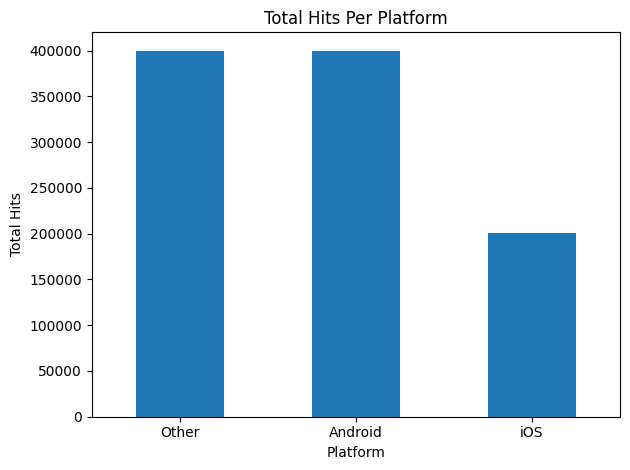

In [32]:
# Function to extract platform from user agent
def extract_platform(user_agent):
  if "Android" in user_agent:
    return "Android"
  elif "Mac" in user_agent:
    return "iOS"
  else:
    return "Other"

# Apply the extract_platform function to create a new 'Platform' column
log_data["Platform"] = log_data["UserAgent"].apply(extract_platform)

# Calculate total hits per platform
platform_hits = log_data["Platform"].value_counts()

# Print total hits per platform
print("Total hits per platform:")
print(platform_hits)

# Plotting the bar graph
platform_hits.plot(kind='bar')
plt.xlabel("Platform")
plt.ylabel("Total Hits")
plt.title("Total Hits Per Platform")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**5. Total hits per browser**

Total hits per browser:
Chrome     599357
Firefox    200346
Safari     200297
Name: Browser, dtype: int64


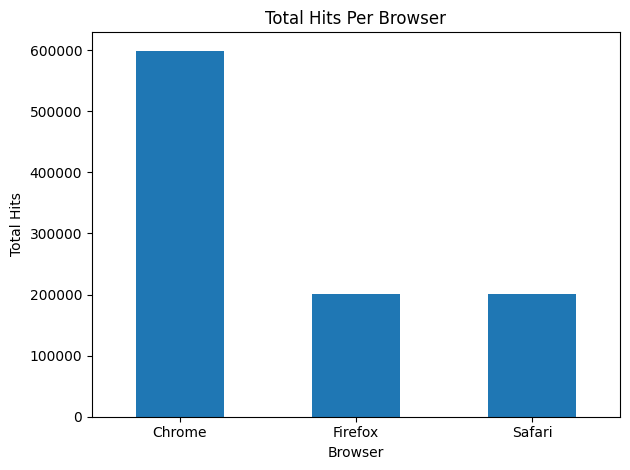

In [33]:
# Function to extract browser from user agent
def extract_browser(user_agent):
    if re.search(r'Firefox', user_agent, re.IGNORECASE):
        return "Firefox"
    elif re.search(r'Chrome', user_agent, re.IGNORECASE):
        return "Chrome"
    elif re.search(r'Safari', user_agent, re.IGNORECASE):
        return "Safari"
    elif re.search(r'Edge', user_agent, re.IGNORECASE):
        return "Edge"
    elif re.search(r'Opera', user_agent, re.IGNORECASE):
        return "Opera"
    else:
        return "Other"

# Apply the extract_browser function to create a new 'Browser' column
log_data["Browser"] = log_data["UserAgent"].apply(extract_browser)

# Group by browser and count hits
browser_hits = log_data["Browser"].value_counts()

# Print total hits per browser
print("Total hits per browser:")
print(browser_hits)

# Plotting the bar graph
browser_hits.plot(kind='bar')
plt.xlabel("Browser")
plt.ylabel("Total Hits")
plt.title("Total Hits Per Browser")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**6. Traffic distribution on each site hourly basis**

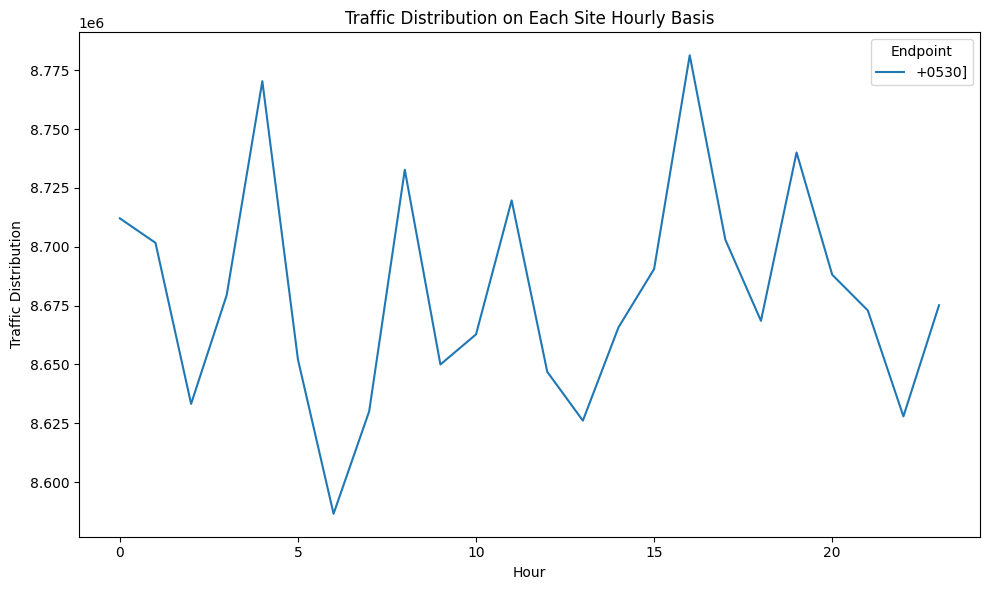

In [34]:
# Generate hours and add them to the "Hour" column
log_data["Hour"] = [random.randint(0, 23) for _ in range(len(log_data))]

# Calculate total data size per site-hour
site_hourly_data = log_data.groupby(["Endpoint", "Hour"])["ResponseSize"].sum().reset_index()

# Calculate the total number of hours
total_hours = log_data["Hour"].nunique()

# Calculate traffic distribution on each site hourly basis
site_hourly_data["TrafficDistribution"] = site_hourly_data["ResponseSize"] / total_hours

# Pivot the data for plotting
pivot_data = site_hourly_data.pivot(index="Hour", columns="Endpoint", values="TrafficDistribution")

# Plot the line graph
pivot_data.plot(kind="line", figsize=(10, 6))
plt.xlabel("Hour")
plt.ylabel("Traffic Distribution")
plt.title("Traffic Distribution on Each Site Hourly Basis")
plt.legend(title="Endpoint")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**7. Total number of hits per hour (descending order) and display descending order of their count**

Total number of hits per hour (descending order):
    Hour  TotalHitsPerHour
0      4             41912
1     12             41908
2     21             41895
3      1             41823
4     23             41814
5     14             41793
6      8             41754
7     20             41731
8     22             41718
9     13             41705
10     0             41705
11     9             41698
12    11             41690
13     7             41686
14    19             41667
15     3             41644
16    15             41606
17    10             41586
18     5             41575
19    16             41475
20     2             41465
21    18             41439
22    17             41424
23     6             41287


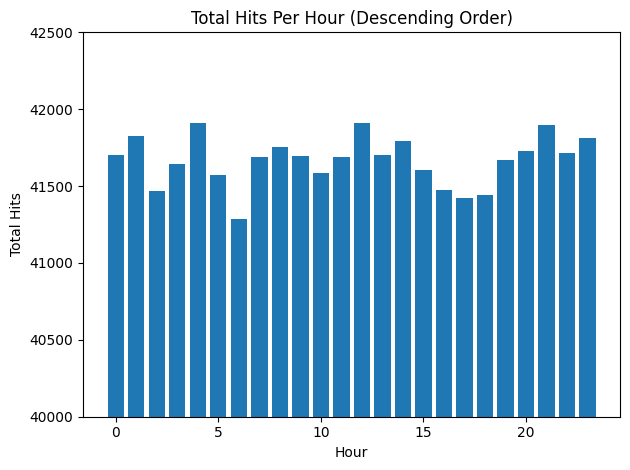

In [35]:
# Generate hours using the random library and add them to the "Hour" column
log_data["Hour"] = [random.randint(0, 23) for _ in range(len(log_data))]

# Calculate total number of hits per hour
hits_per_hour = log_data.groupby("Hour")["Index"].count().reset_index()

# Sort hits per hour in descending order of their count
hits_per_hour_sorted = hits_per_hour.sort_values(by="Index", ascending=False)

# Reset the index and rename the "Index" column
hits_per_hour_sorted.reset_index(drop=True, inplace=True)
hits_per_hour_sorted.rename(columns={"Index": "TotalHitsPerHour"}, inplace=True)

# Print total number of hits per hour (descending order)
print("Total number of hits per hour (descending order):")
print(hits_per_hour_sorted)

# Plot the bar graph
plt.bar(hits_per_hour_sorted["Hour"], hits_per_hour_sorted["TotalHitsPerHour"])
plt.xlabel("Hour")
plt.ylabel("Total Hits")
plt.title("Total Hits Per Hour (Descending Order)")
plt.ylim(40000, 42500)  # Set y-axis limits
plt.tight_layout()
plt.show()